# Explore here

In [156]:
import pandas as pd 
import numpy as np
import regex as re
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Load dataset

In [157]:
df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/NLP-project-tutorial/main/url_spam.csv')
df.head()

,url,is_spam
0,https://briefingday.us8.list-manage.com/unsubs...,True
1,https://www.hvper.com/,True
2,https://briefingday.com/m/v4n3i4f3,True
3,https://briefingday.com/n/20200618/m#commentform,False
4,https://briefingday.com/fan,True


In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999 entries, 0 to 2998
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   url      2999 non-null   object
 1   is_spam  2999 non-null   bool  
dtypes: bool(1), object(1)
memory usage: 26.5+ KB


# Preprocess the links

We change the string values for boolean numerical values

In [159]:
df['is_spam'] = df['is_spam'].apply(lambda x: 1 if x else 0).astype(int)
df

,url,is_spam
0,https://briefingday.us8.list-manage.com/unsubs...,1
1,https://www.hvper.com/,1
2,https://briefingday.com/m/v4n3i4f3,1
3,https://briefingday.com/n/20200618/m#commentform,0
4,https://briefingday.com/fan,1
...,...,...
2994,https://www.smartcitiesworld.net/news/news/dee...,0
2995,https://www.youtube.com/watch,1
2996,https://techcrunch.com/2019/07/04/an-optimisti...,0
2997,https://www.technologyreview.com/2019/12/20/13...,0


**Eliminate repeated values**

In [160]:
print(df.shape)
print(f'Spam: {len(df.loc[df.is_spam == 1])}')
print(f'No spam: {len(df.loc[df.is_spam == 0])}')

(2999, 2)
Spam: 696
No spam: 2303


In [161]:
df = df.drop_duplicates()
df = df.reset_index(inplace= False, drop= True)
df.shape

(2369, 2)

We repeat the code again to check how many rows remain in each value.

In [162]:
print(df.shape)
print(f'Spam: {len(df.loc[df.is_spam == 1])}')
print(f'No Spam: {len(df.loc[df.is_spam == 0])}')

(2369, 2)
Spam: 244
No Spam: 2125


**Text processing**

Remove special characters, whitespace, and make all text lowercase.

In [163]:
import regex as re

def preprocess_text(text):
    # Remove any character that is not a letter (a-z) or white space ( )
    text = re.sub(r'[^a-z ]', ' ', text)
    
    # Remove white spaces
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
    text = re.sub(r'\^[a-zA-Z]\s+', ' ', text)

    # Multiple white spaces into one
    text = re.sub(r'\s+', " ", text.lower())

    # Remove tags
    text = re.sub("&lt;/?.*?&gt;"," &lt;&gt; ", text)

    return text.split()

df['url'] = df['url'].apply(preprocess_text)
df.head()

,url,is_spam
0,"[https, briefingday, us, list, manage, com, un...",1
1,"[https, www, hvper, com]",1
2,"[https, briefingday, com, v, i]",1
3,"[https, briefingday, com, m, commentform]",0
4,"[https, briefingday, com, fan]",1


Lemmatization of the text and eliminate stopwords

In [164]:
from textblob import TextBlob
from textblob import Word
# Descargar los recursos adicionales necesarios para textblob
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Definir la función para lematizar y eliminar stopwords
def preprocess_text_textblob(tokens):
    # Unir los tokens en una cadena
    text = ' '.join(tokens)
    # Crear un objeto TextBlob
    blob = TextBlob(text)
    # Personalizar lematización
    tokens = [custom_lemmatize(word) for word in blob.words if word not in nltk.corpus.stopwords.words('english') and len(word) > 3]
    return tokens

# Función de lematización personalizada
def custom_lemmatize(word):
    # Agregar reglas específicas
    if word.lower() == 'hvper':
        return 'hyper'
    # Lematizar usando WordNet
    return Word(word).lemmatize()
# Aplicar la función preprocess_text_textblob a la columna "url" de df
df['url'] = df['url'].apply(preprocess_text_textblob)
df.head()

[nltk_data] Downloading package punkt to /home/vscode/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/vscode/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/vscode/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,url,is_spam
0,"[http, briefingday, list, manage, unsubscribe]",1
1,"[http, hyper]",1
2,"[http, briefingday]",1
3,"[http, briefingday, commentform]",0
4,"[http, briefingday]",1


Represent tokens in a word cloud.

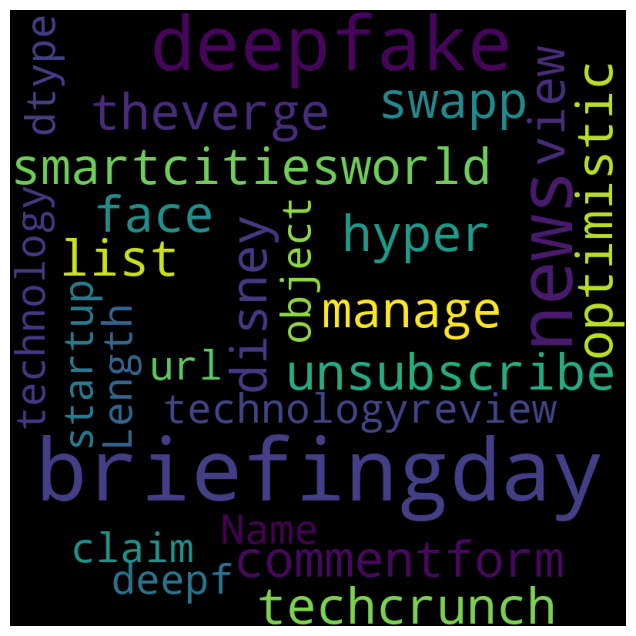

In [165]:
wordcloud = WordCloud(width = 800, height = 800, background_color = 'black', max_words = 1000, min_font_size = 20, random_state = 21)\
    .generate(str(df['url']))

fig = plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Convert it to numbers before starting the training model

In [166]:
from sklearn.feature_extraction.text import TfidfVectorizer

tokens_list = df['url']
tokens_list = [' '.join(tokens) for tokens in tokens_list]

vectorizer = TfidfVectorizer(max_features = 5000, max_df = 0.8, min_df = 5)
X = vectorizer.fit_transform(tokens_list).toarray()
y = df['is_spam']

X[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

**Train test split**

Split the data set into train and test.

In [167]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 21)

**Train the model**

In [168]:
from sklearn.svm import SVC

svm_model = SVC(kernel = 'linear', random_state = 21)
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=21)

**Model prediction**

In [169]:
y_pred = svm_model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

In [170]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9367088607594937

**Optimization model**

We're going to optimize the training model using hyperparameters to improve performance

In [175]:
from sklearn.model_selection import GridSearchCV

hyperparams = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'kernel': ['linear', 'poly', 'sigmoid', 'precomputed’'],
    'degree': [1, 2, 3, 4, 5],
    'gamma': ["scale", "auto"]
}

#Set up cross-validated grid search
grid = GridSearchCV(svm_model, hyperparams, scoring = "accuracy", cv = 5)
grid

GridSearchCV(cv=5, estimator=SVC(kernel='linear', random_state=21),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'degree': [1, 2, 3, 4, 5], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'sigmoid',
                                    'precomputed’']},
             scoring='accuracy')

In [176]:
# Fit the model to the training data
grid.fit(X_train, y_train)

# Print the best hyperparameters found
print('Best hyperparams:', grid.best_params_)

Best hyperparams: {'C': 1000, 'degree': 1, 'gamma': 'auto', 'kernel': 'poly'}


/home/vscode/.local/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
350 fits failed out of a total of 1400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
350 fits failed with the following error:
Traceback (most recent call last):
  File "/home/vscode/.local/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/vscode/.local/lib/python3.11/site-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/home/vscode/.local/lib/python3.11/site-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/home/vscode/.l

In [183]:
optimization_model = SVC(C = 1000, degree = 1, gamma = 'auto', kernel = 'poly', random_state = 21)
optimization_model.fit(X_train, y_train)

SVC(C=1000, degree=1, gamma='auto', kernel='poly', random_state=21)

In [184]:
# Get the prediction on the test set
y_pred = grid.predict(X_test)

# Calculate and display model accuracy on test set
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy on test set: {accuracy:.5f}")

Model accuracy on test set: 0.93671


**Save the model**

In [186]:
from pickle import dump

dump(svm_model, open('../models/svm_classif_C-1000_deg-1_gam-auto_ker-poly_21.json', 'wb'))